In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc = {'figure.figsize': (20,8)}, style = 'whitegrid', palette = 'Set2')

In [2]:
#libraries for geospatial analysis
import geopandas as gpd
import mapclassify as mpc
import folium as fl
from folium.plugins import HeatMap
from folium.plugins import PolyLineTextPath

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print("Number of rows     :{}".format(df.shape[0]))
print("Number of columns  :{}".format(df.shape[1]))

Number of rows     :48895
Number of columns  :16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df['last_review'] = df['last_review'].astype('datetime64[ns]')
df['last_review_day'] = df['last_review'].dt.day
df['last_review_month'] = df['last_review'].dt.month
df['last_review_year'] = df['last_review'].dt.year

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,19.0,10.0,2018.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0,5.0,2019.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,5.0,7.0,2019.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,19.0,11.0,2018.0


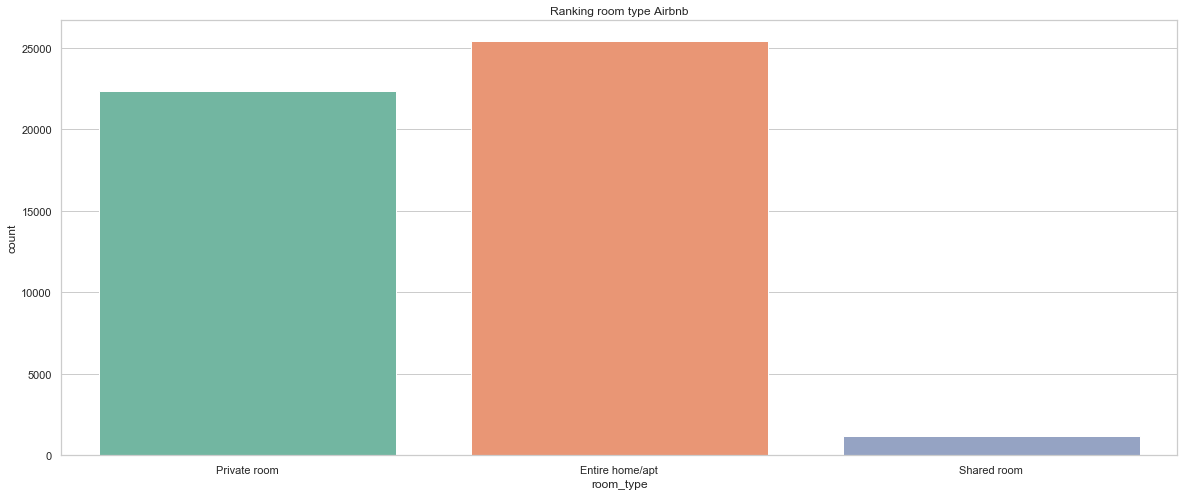

In [8]:
sns.countplot(df['room_type'])
plt.title('Ranking room type Airbnb')
plt.show()

In [9]:
pivot=df.pivot_table(values='price', index='neighbourhood_group', columns='room_type')

In [10]:
pivot

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


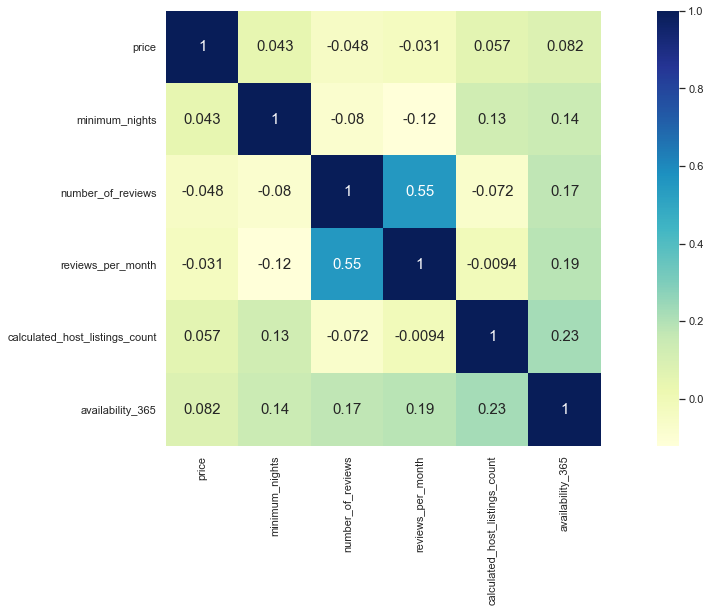

In [11]:
# get correlation matrix for numerical columns
df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# draw heatmap
sns.heatmap(df_corr, annot = True, annot_kws = {'size': 15}, square = True, cmap = 'YlGnBu')

## from this observation, we can conclude that most of the numerical features do not really have strong correlations with each other directly, apart from review count & rate.

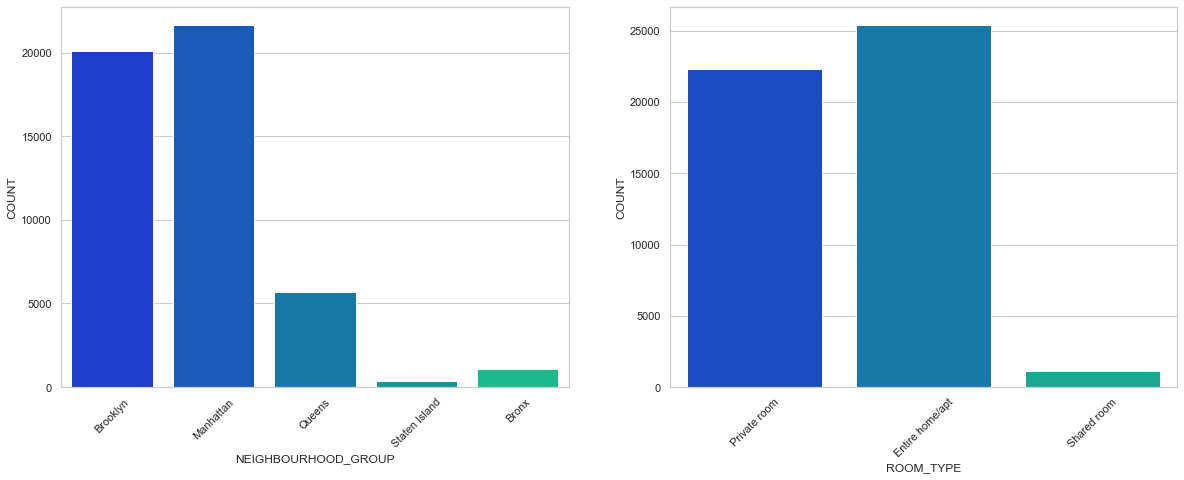

In [12]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = df["neighbourhood_group"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(x = df["room_type"], palette = "winter")
plt.xlabel("ROOM_TYPE", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

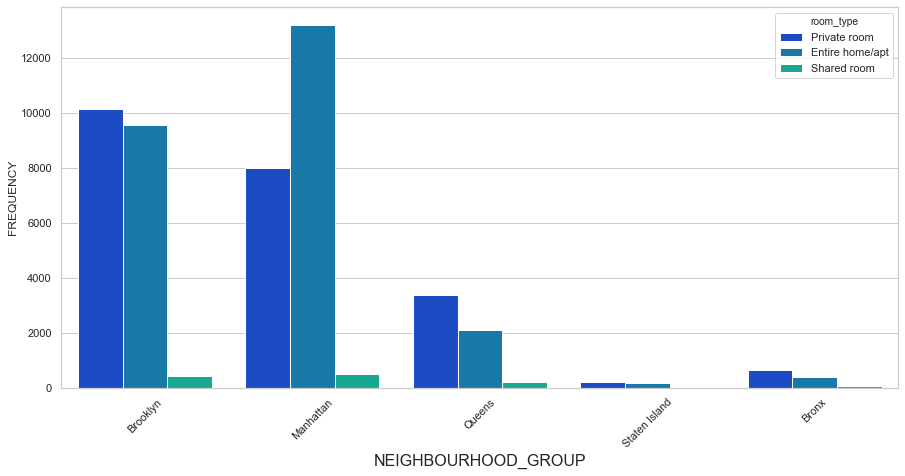

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x = df["neighbourhood_group"], hue = df["room_type"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 16)
plt.ylabel("FREQUENCY", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

In [14]:
df.reviews_per_month.fillna(value = 0, inplace = True)

In [15]:
min_night_type = []

for row in range(len(df)):
    if df.minimum_nights[row] <= 5:
        min_night_type.append('1-5 days')
    elif df.minimum_nights[row] <= 14:
        min_night_type.append('1-2 weeks')
    elif df.minimum_nights[row] <= 90:
        min_night_type.append('1-3 months')
    elif df.minimum_nights[row] <= 180:
        min_night_type.append('4-6 months')
    else:
        min_night_type.append('7-12 months')  

In [16]:
df['min_night_type'] = min_night_type

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year,min_night_type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,19.0,10.0,2018.0,1-5 days
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0,5.0,2019.0,1-5 days
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN,NaN,NaN,1-5 days
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,5.0,7.0,2019.0,1-5 days
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,19.0,11.0,2018.0,1-2 weeks


In [18]:
def draw_map():
    nyc = [df.latitude.mean(), df.longitude.mean()]
    boroughs = df.groupby('neighbourhood_group').mean().reset_index()
    boroughs_name = boroughs['neighbourhood_group'].values.tolist()
    boroughs_loc = boroughs[['latitude', 'longitude']].values.tolist()

    base_map = fl.Map(location = nyc, control_scale = True, zoom_start = 11, tiles = 'OpenStreetMap')

    for i in range(len(boroughs_name)):
        attr = {'fill': 'midnightblue', 'font-weight': 'bold', 'font-size': '20'}
        pl = fl.PolyLine([[boroughs_loc[i][0], boroughs_loc[i][1]-.1], [boroughs_loc[i][0], boroughs_loc[i][1]+.1]], weight = 15, color = 'rgb(255,255,255, 0)')
        base_map.add_child(pl)
        base_map.add_child(PolyLineTextPath(pl, text = boroughs_name[i], attributes = attr, center = True))
    
    return base_map

base_map = draw_map()    
base_map.add_child(HeatMap(data = df[['latitude', 'longitude']], min_opacity = 0.2, radius = 15, blur = 40))
base_map.add_child(fl.ClickForMarker(popup='High amount of listings'))

## Manhattan and Brooklyn have the most amount of listing options available

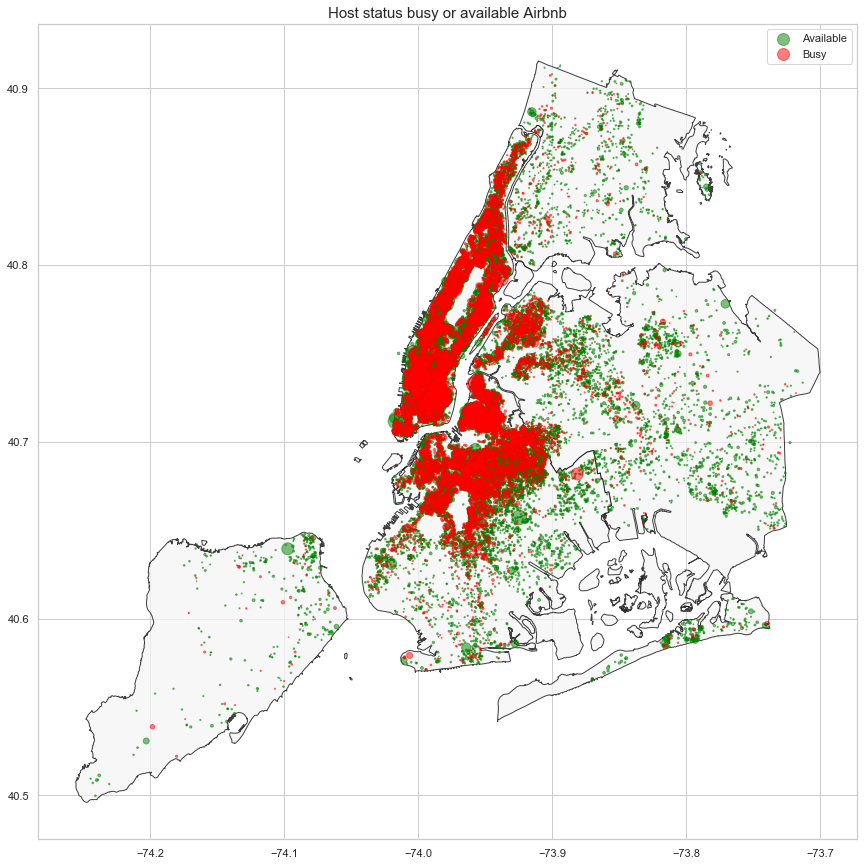

In [19]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
busy = df[df.availability_365.isin([0,1,2])]
avai = df[df.availability_365 != 0]
ax4 =  nyc.plot(figsize=(20,15), color='whitesmoke', edgecolor='k', alpha=0.75)
ax4.scatter(avai.longitude, avai.latitude, s=avai.price/35, color='green',  alpha=0.5, label = 'Available')
ax4.scatter(busy.longitude, busy.latitude, s=busy.price/35, color='red',  alpha=0.5, label='Busy')
ax4.set_title('Host status busy or available Airbnb', fontsize=15)
ax4.legend(loc='best')
plt.show()

# brooklyn and manhattan are the most busiest

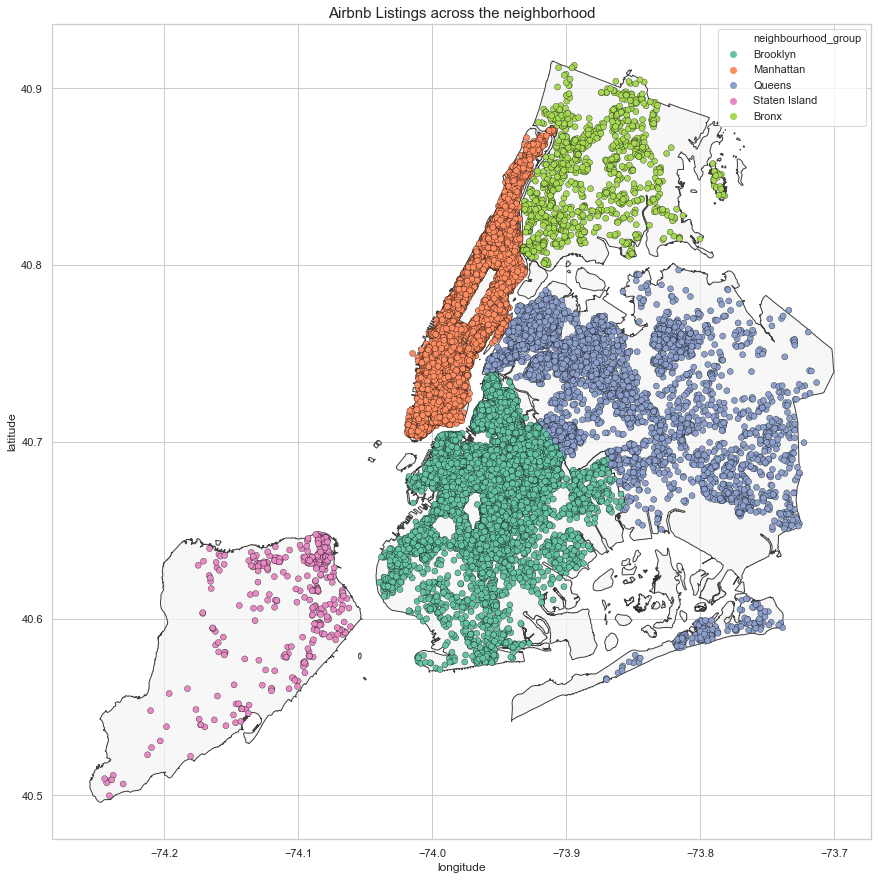

In [34]:
ax2 =  nyc.plot(figsize=(20,15), color='whitesmoke', edgecolor='k', alpha=0.75)
ax2.set_title('Airbnb Listings across the neighborhood', fontsize=15)
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.scatterplot(x= 'longitude', y='latitude',hue= 'neighbourhood_group',edgecolor='black',linewidth=0.3, data=df)

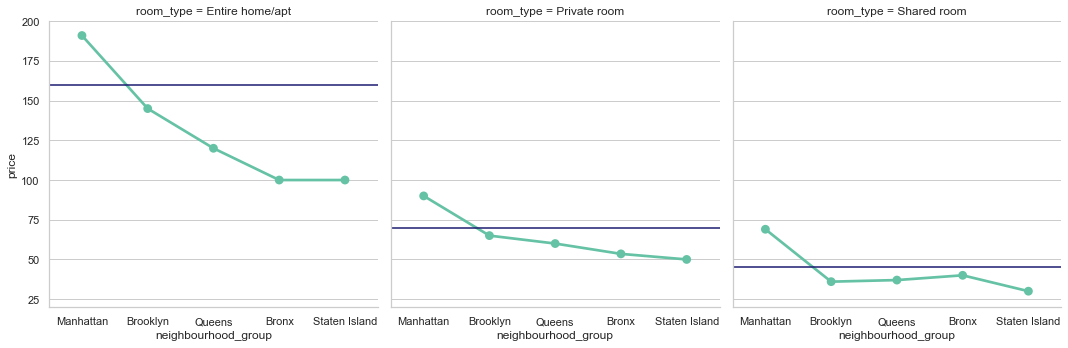

In [20]:
avg_roomtype_cost = df.groupby('room_type').price.median()
top_price = df.groupby(['neighbourhood_group', 'room_type']).median().sort_values(by = 'price', ascending = False).reset_index()

g = sns.catplot(x = 'neighbourhood_group', y = 'price', data = top_price, ci = False, estimator = np.median, kind = 'point', col = 'room_type')

for i in range(len(avg_roomtype_cost)):
    g.axes[0][i].axhline(avg_roomtype_cost[i], color = 'midnightblue')

plt.show()

# as we can see, Manhattan has the most expensive listing offers for all room_types
# on the other hand, Staten Island has the cheapest listings. 
#This further reinforces the previous observations we made as to why each Staten Island hosts get alot of customers.

In [21]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year,min_night_type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,19.0,10.0,2018.0,1-5 days
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0,5.0,2019.0,1-5 days
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN,NaN,NaN,1-5 days
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,5.0,7.0,2019.0,1-5 days
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,19.0,11.0,2018.0,1-2 weeks


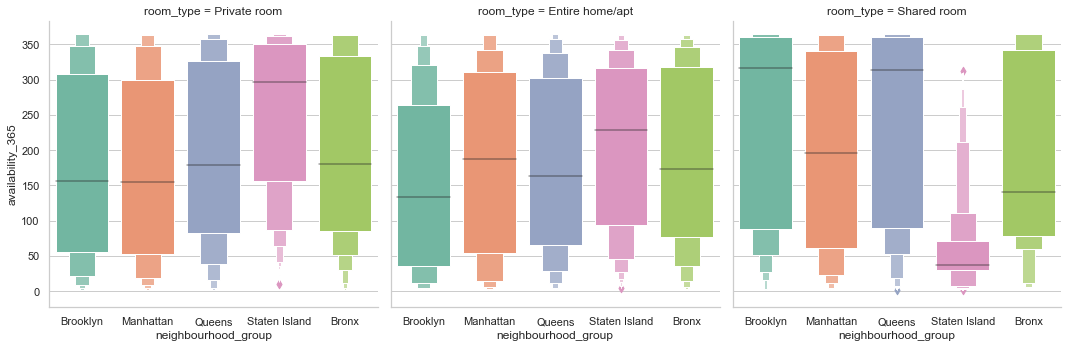

In [22]:
# inspect the availability of listings according to each borough and room type

sns.catplot(x = 'neighbourhood_group', y = 'availability_365', data = df.loc[df.availability_365 > 0], ci = False, estimator = np.median, kind = 'boxen', col = 'room_type')

## For private rooms, most Staten Island listings have them available throughout the whole year compared to the other boroughs.
## Entire homes in NYC are generally not available for the whole year, and more towards the 6 months mark.
## For shared rooms, Brooklyn & Queens have them available through out most of the year, while Staten Island and Bronx have them for only a couple months in a year.


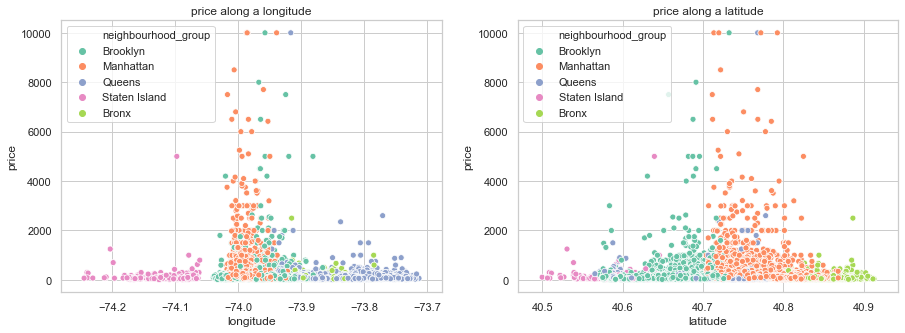

In [23]:
fig=plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)

sns.scatterplot(x='longitude', y='price', hue='neighbourhood_group', data=df, ax=a1)
sns.scatterplot(x='latitude', y='price', hue='neighbourhood_group', data=df, ax=a2)

a1.set_title('price along a longitude')
a2.set_title('price along a latitude')
plt.show()